In [17]:
%run ../utils/init_notebook.py

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from utils.data_loader import load_mnist

# Load data
X_train, y_train, X_test, y_test = load_mnist()

# 1. Basic info
print("Training set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)
print(f"Pixel range: min={X_train.min()}, max={X_train.max()}")

Project root added to sys.path: d:\Handwritten Digit Recognition
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)
Pixel range: min=0.0, max=1.0


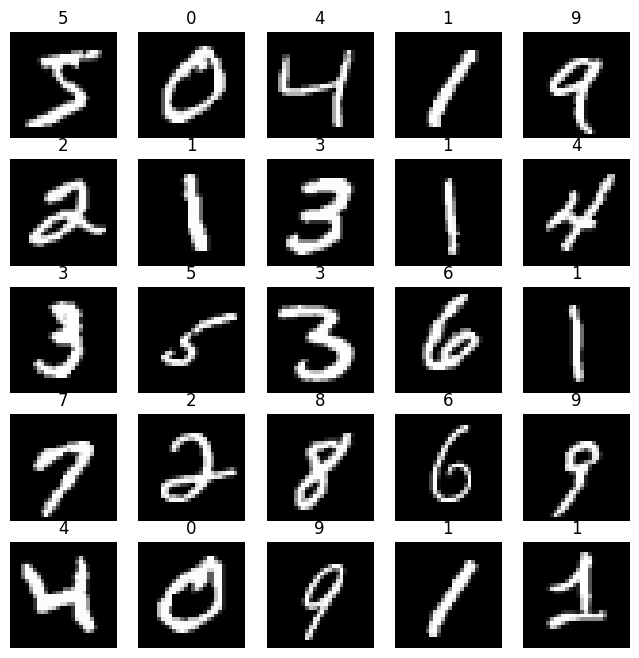

In [18]:
# 2. Show some samples
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(str(y_train[i]))
    plt.axis('off')
plt.show()

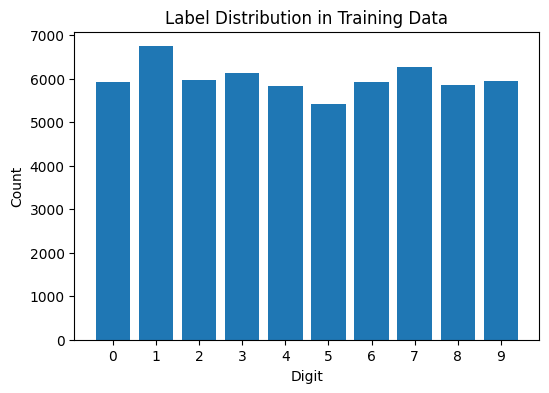

In [19]:
# 3. Label distribution
plt.figure(figsize=(6, 4))
plt.hist(y_train, bins=np.arange(11) - 0.5, rwidth=0.8)
plt.xticks(range(10))
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Label Distribution in Training Data")
plt.show()

In [20]:
# 4. Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# For CNN
X_train_cnn = np.expand_dims(X_train, -1)
X_test_cnn = np.expand_dims(X_test, -1)

# One-hot labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [ ]:
# 5. Save preprocessed data
np.savez("mnist_preprocessed.npz",
         x_train_cnn=X_train_cnn, x_test_cnn=X_test_cnn,
         x_train_flat=X_train.reshape(-1, 784), x_test_flat=X_test.reshape(-1, 784),
         y_train_cat=y_train_cat, y_test_cat=y_test_cat,
         y_train=y_train, y_test=y_test)